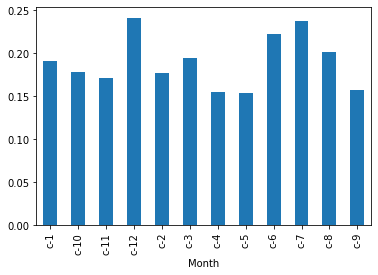

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('flight_delays.csv')
data1 = df[df['dep_delayed_15min'] == 'Y'].groupby('Month').DepTime.count()
data2 = df.groupby('Month').DepTime.count()
data3 = data1/data2
data3.plot(kind='bar', x = 'Month', y = 'dep_delayed_15min')
plt.show()

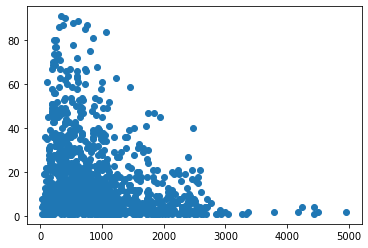

In [ ]:
#зависимость количества задержек от длины пути
max_dist = max(df['Distance'])
x1 = np.linspace(0, max_dist, 50)
df1 = pd.Series(df[df['dep_delayed_15min'] == 'Y'].groupby('Distance').Distance.count())
x = df1.index

#df1 = df1.reset_index(drop=True)
#df1.plot(kind ='line', x ='Distance', y = 'count' )
#plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.scatter(x, y = df1)
plt.show()

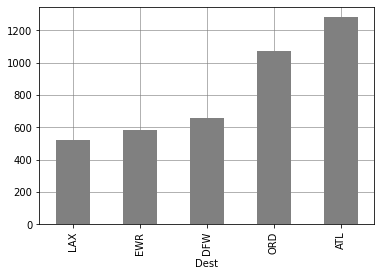

In [ ]:
#топ 5 направлений, для которых чаще всего происходят задержки
df2 = pd.Series(df[df['dep_delayed_15min'] == 'Y'].groupby('Dest').dep_delayed_15min.count().sort_values()).tail(5)
df2.plot(kind = 'bar', color = 'grey')
plt.grid(color='gray', linestyle='-', linewidth=0.6)



Seasons
Autumn    4177
Spring    4295
Summer    5723
Winter    4849
Name: dep_delayed_15min, dtype: int64


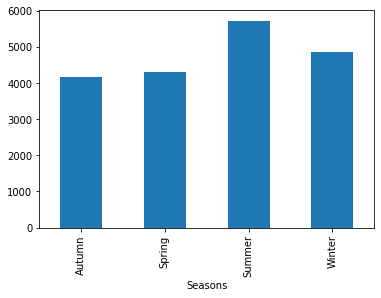

In [11]:
d = pd.read_csv('flight_delays.csv')
for i in range(1, 13, 1):
    if i in [1, 2, 12]:
        d.loc[d["Month"] == 'c-'+str(i), "Month"] = 'Winter'
    elif i in [3, 4, 5]:
        d.loc[d["Month"] == 'c-' + str(i), "Month"] = 'Spring'
    elif i in [6, 7, 8]:
        d.loc[d["Month"] == 'c-'+str(i), "Month"] = 'Summer'
    else:
        d.loc[d["Month"] == 'c-'+str(i), "Month"] = 'Autumn'
df = d.rename(columns={"Month": "Seasons"})
df3 = df[df['dep_delayed_15min'] == 'Y'].groupby('Seasons').dep_delayed_15min.count()
print(df3)
df3.plot(kind='bar' )
plt.show()

UniqueCarrier
AQ     18
HA     33
TZ     64
DH    156
F9    156
HP    196
B6    393
YV    478
AS    541
FL    736
Name: dep_delayed_15min, dtype: int64


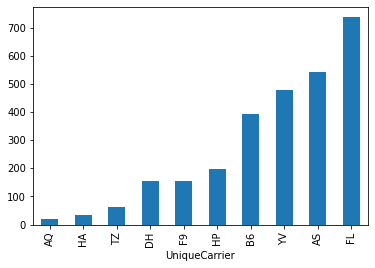

UniqueCarrier
XE    1026
NW    1075
EV    1082
US    1085
OO    1277
UA    1322
DL    1373
MQ    1448
AA    1770
WN    3219
Name: dep_delayed_15min, dtype: int64


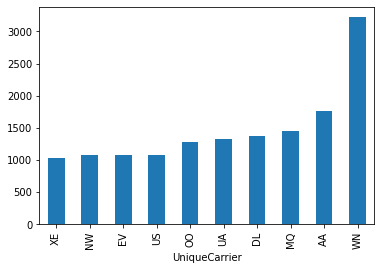

In [18]:
df3 = df[df['dep_delayed_15min'] == 'Y'].groupby('UniqueCarrier').dep_delayed_15min.count().sort_values()
a = df3.head(10)
b = df3.tail(10)
print(a)
a.plot(x="UniqueCarrier", kind="bar")
plt.show()
print(b)
b.plot(x="UniqueCarrier", kind="bar")

plt.show()
